In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta


In [ ]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 3.4 MB/s 
     |████████████████████████████████| 2.8 MB 10.9 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier 
from pypfopt import risk_models 
from pypfopt import expected_returns
from pypfopt.cla import CLA
import pypfopt.plotting as pplt
from matplotlib.ticker import FuncFormatter

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

import yfinance as yf


     |████████████████████████████████| 63 kB 5.8 MB/s 
     |████████████████████████████████| 6.4 MB 50.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
df_mc = pd.read_excel('pb_new.xlsx')
df_mc['Ticker'] = df_mc['Unnamed: 0']
df_mc.drop('Unnamed: 0', axis = 1, inplace = True)
df_mc

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Ticker
0,0.9246,0.5503,0.7496,0.5837,0.3616,0.8877,0.7567,1.0837,0.8327,0.9704,0.75220,AC.PA
1,0.8135,0.6813,0.6989,1.0409,0.9322,0.5694,1.6124,0.8997,0.5764,0.6433,0.54560,ACA.PA
2,1.2491,1.0063,0.4374,1.2164,1.1098,0.4545,3.0680,0.7457,0.5050,0.5907,0.44880,AI.PA
3,1.0878,1.1983,1.3899,1.3395,1.6970,1.4681,1.2903,1.1236,0.8072,1.2378,0.35680,AIR.PA
4,0.8519,0.8575,0.8631,0.8407,0.7320,1.5578,2.0843,1.9541,1.2079,1.4551,1.32890,ALO.PA
5,1.4198,0.5536,0.6619,0.7758,1.0702,1.3619,1.0748,1.5850,1.8238,2.6265,2.67010,BN.PA
6,2.1780,1.9158,0.9338,2.5159,2.2505,1.0409,0.5990,1.4587,0.8705,1.0554,1.32170,BNP.PA
7,0.7870,1.8570,0.5381,2.2318,2.1261,1.3682,0.6016,4.6109,0.3770,0.4057,0.39135,CA.PA
8,3.1764,2.0686,0.5145,1.4881,1.6392,0.1819,0.8214,3.1261,1.5904,1.2480,1.01590,CAP.PA
9,1.3369,1.0349,1.9646,1.8664,2.1820,1.8245,1.4239,1.4236,1.5343,1.4070,1.32780,CS.PA


In [ ]:
df_mc.sort_values(by=2021, inplace = True)
#df_mc

In [ ]:
df_mc[2021].describe()

count    37.000000
mean      3.961874
std       6.234323
min       0.237400
25%       1.053300
50%       2.188300
75%       4.119200
max      36.585800
Name: 2021, dtype: float64

In [ ]:
df_mc1 = df_mc.loc[df_mc[2021] >= 4.119200]
mc12012 = df_mc1['Ticker'].tolist()
mc12012

['DG.PA',
 'SGO.PA',
 'PEUG.PA',
 'URW.AS',
 'TTE.PA',
 'STM.PA',
 'SEV.PA',
 'TE.PA',
 'VIE.PA',
 'VIV.PA']

In [ ]:
df_stocks= yf.download(['DG.PA',
 'SGO.PA',
 'PEUG.PA',
 'URW.AS',
 'TTE.PA',
 'STM.PA',
 
 
 'VIE.PA',
 'VIV.PA']
,
  start='2021-01-01', end='2021-12-31')['Adj Close']
df_stocks.fillna(df_stocks.mean(), inplace = True)

mu = expected_returns.mean_historical_return(df_stocks) 
Sigma = risk_models.sample_cov(df_stocks)
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0.01,0.3)) 
sharpe_pfolio=ef.max_sharpe() 
sharpe_pwt=ef.clean_weights()
print(sharpe_pwt)



[*********************100%***********************]  8 of 8 completed
OrderedDict([('DG.PA', 0.01), ('PEUG.PA', 0.01389), ('SGO.PA', 0.3), ('STM.PA', 0.14324), ('TTE.PA', 0.21287), ('URW.AS', 0.01), ('VIE.PA', 0.3), ('VIV.PA', 0.01)])


In [ ]:
print (mc)

['TTE.PA', 'VIE.PA', 'CAP.PA', 'SAN.PA', 'AC.PA', 'VK.PA', 'MC.PA', 'PEUG.PA', 'SU.PA', 'EN.PA', 'ALO.PA', 'RI.PA', 'RNO.PA', 'CA.PA', 'EL.PA', 'ACA.PA', 'URW.AS', 'KER.PA', 'SGO.PA', 'SEV.PA', 'PUB.PA', 'VIV.PA', 'DG.PA', 'AIR.PA', 'MT.AS', 'GLE.PA', 'AI.PA', 'CS.PA', 'ORA.PA', 'BN.PA', 'EDF.PA', 'BNP.PA', 'ENGI.PA', 'OR.PA', 'ML.PA', 'STM.PA', 'TE.PA']


(-1.1000000059845825,
 1.100000001312142,
 -1.107974144112471,
 1.1079741435946078)

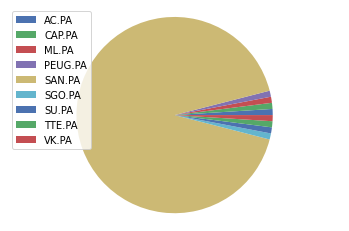

In [ ]:
tickers =[]
t_weights =[]
for i in sharpe_pwt:
  if sharpe_pwt[i] > 0:
    t_weights.append(sharpe_pwt[i])
    tickers.append(i)


fig1, ax1 = plt.subplots()
ax1.pie(t_weights) 
ax1.axis('equal')

plt.legend(tickers, loc="best")
plt.axis('equal')

[*********************100%***********************]  1 of 1 completed


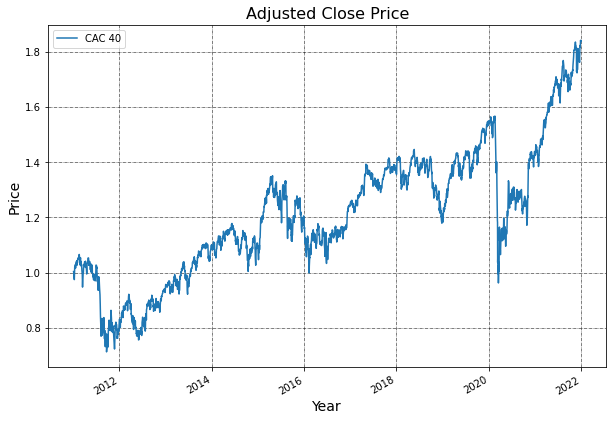

In [ ]:

data = yf.download(['^FCHI'], start='2011-01-01', end='2021-12-31') ['Adj Close']
ax2 = ((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))
plt.legend(['CAC 40'])
plt.title("Adjusted Close Price", fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [ ]:
df_reg = pd.read_excel('dat.xlsx')
df_reg

,Mc1,Mc3,pe1,pe3,pb1,pb3,Год
0,0.000432,-0.017076,0.001236,-0.008612,-0.007783,-0.008612,2011
1,0.006072,-0.011218,-0.002244,-0.002577,-0.004428,-0.002577,2011
2,0.010708,0.011478,-0.001380,0.006849,-0.005807,0.006849,2011
3,-0.004569,-0.017641,-0.006910,0.000227,-0.010817,0.000227,2011
4,-0.017777,-0.006590,-0.011119,-0.013534,-0.011031,-0.013534,2011
...,...,...,...,...,...,...,...
2810,-0.002053,-0.003747,-0.003079,-0.002156,-0.006096,-0.001530,2021
2811,0.009539,-0.000927,0.002687,0.005219,0.010507,0.007543,2021
2812,0.005835,0.006104,0.008073,0.002631,0.006988,0.010463,2021
2813,-0.004031,-0.002539,-0.006064,0.001104,-0.004566,-0.003256,2021


In [ ]:
df_d = df_reg.loc[df_reg['Год'] == 2021]
df_d
rf=0.0398
mean = df_d.mean() * 255 -rf
sigma = df_d.std() * np.sqrt(255)
sharpe =  mean / sigma
sharpe

Mc1    1.562289
Mc3   -0.556551
pe1    2.590891
pe3   -0.655858
pb1    2.196184
pb3    2.189942
Год         inf
dtype: float64

In [ ]:
mean = df_d.mean() * 255 -rf
std_neg = df_d[df_d<rf].std()*np.sqrt(255)
sortino = mean/std_neg
sortino

Mc1    1.562289
Mc3   -0.556551
pe1    2.739961
pe3   -0.655858
pb1    2.338594
pb3    2.189942
Год         NaN
dtype: float64

In [ ]:
df_reg = pd.read_excel('dat.xlsx')

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
results = smf.ols('pb1 ~ CAC40', data=df_reg).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pb1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5247
Date:                Tue, 26 Apr 2022   Prob (F-statistic):              0.470
Time:                        21:24:42   Log-Likelihood:                 768.35
No. Observations:                 255   AIC:                            -1533.
Df Residuals:                     253   BIC:                            -1526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0017      0.001      2.326      0.021       0.000       0.003
CAC40          0.0614      0.085      0.724      0.470      -0.106       0.228
==============================================================================
Omnibus:                       18.126   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.276
Skew:                          -0.039   Prob(JB):                     2.22e-13
Kurtosis:                       5.341   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results = smf.ols('pb3 ~ CAC40', data=df_reg).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pb3   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7665
Date:                Tue, 26 Apr 2022   Prob (F-statistic):              0.382
Time:                        21:25:11   Log-Likelihood:                 792.28
No. Observations:                 255   AIC:                            -1581.
Df Residuals:                     253   BIC:                            -1573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0016      0.001      2.348      0.020       0.000       0.003
CAC40          0.0675      0.077      0.875      0.382      -0.084       0.219
==============================================================================
Omnibus:                       30.842   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.531
Skew:                          -0.485   Prob(JB):                     2.20e-20
Kurtosis:                       5.753   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""